In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
amzn=pd.read_csv('AMZN_CLOSE',index_col = 'Date',parse_dates=True)
aapl=pd.read_csv('AAPL_CLOSE',index_col = 'Date',parse_dates=True)
cisco=pd.read_csv('CISCO_CLOSE',index_col = 'Date',parse_dates=True)
ibm=pd.read_csv('IBM_CLOSE',index_col = 'Date',parse_dates=True)


In [3]:
stocks = pd.concat([amzn,aapl,cisco,ibm],axis=1)
stocks.columns = ['AMZN','AAPL','CISCO','IBM']
#stocks = stocks[:-1]

In [4]:
stocks

,AMZN,AAPL,CISCO,IBM
Date,,,,
2012-01-03,179.03,53.063218,15.752778,160.830881
2012-01-04,177.51,53.348386,16.057180,160.174781
2012-01-05,177.61,53.940658,15.997991,159.415086
2012-01-06,182.61,54.504543,15.938801,157.584912
2012-01-09,178.56,54.418089,16.040268,156.764786
...,...,...,...,...
2016-12-23,760.59,115.547742,29.730928,163.790152
2016-12-27,771.40,116.281568,29.877002,164.212620
2016-12-28,772.13,115.785740,29.623807,163.279259


In [5]:
stocks.pct_change(1).mean()

AMZN     0.001328
AAPL     0.000750
CISCO    0.000599
IBM      0.000081
dtype: float64

In [6]:
stocks.pct_change(1).head()

,AMZN,AAPL,CISCO,IBM
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.008490,0.005374,0.019324,-0.004079
2012-01-05,0.000563,0.011102,-0.003686,-0.004743
2012-01-06,0.028152,0.010454,-0.003700,-0.011481
2012-01-09,-0.022178,-0.001586,0.006366,-0.005204


In [7]:
log_return = np.log(stocks/stocks.shift(1)) #turn into log

In [8]:
log_return.head()

,AMZN,AAPL,CISCO,IBM
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.008526,0.005360,0.019139,-0.004088
2012-01-05,0.000563,0.011041,-0.003693,-0.004754
2012-01-06,0.027763,0.010400,-0.003707,-0.011547
2012-01-09,-0.022428,-0.001587,0.006346,-0.005218


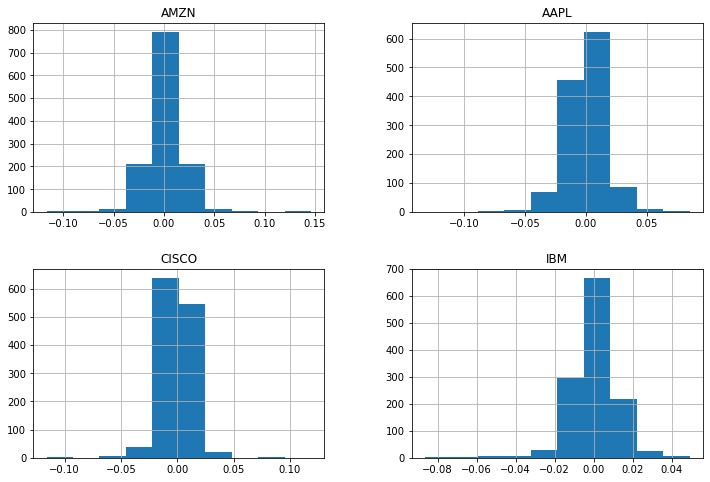

In [9]:
log_return.hist(bins=10,figsize=(12,8));

In [10]:
log_return.cov() * 252

,AMZN,AAPL,CISCO,IBM
AMZN,0.094470,0.018986,0.019956,0.014939
AAPL,0.018986,0.068326,0.017854,0.014464
CISCO,0.019956,0.017854,0.051381,0.018029
IBM,0.014939,0.014464,0.018029,0.035203


In [11]:
log_return.mean()

AMZN     0.001139
AAPL     0.000614
CISCO    0.000497
IBM      0.000011
dtype: float64

In [12]:
np.random.seed(101)
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights
    #expected return

    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    #expected volatatility

    vol_arr[ind]= np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))

    #Sharp Ratio

    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]


In [13]:
sharpe_arr.max()

1.0285601186596725

In [14]:
sharpe_arr.argmax()

4399

In [15]:
all_weights[4399,:]

array([0.57398463, 0.26430476, 0.16035669, 0.00135393])

In [16]:
max_sr_ret = ret_arr[4399]
max_sr_vol = vol_arr[4399]

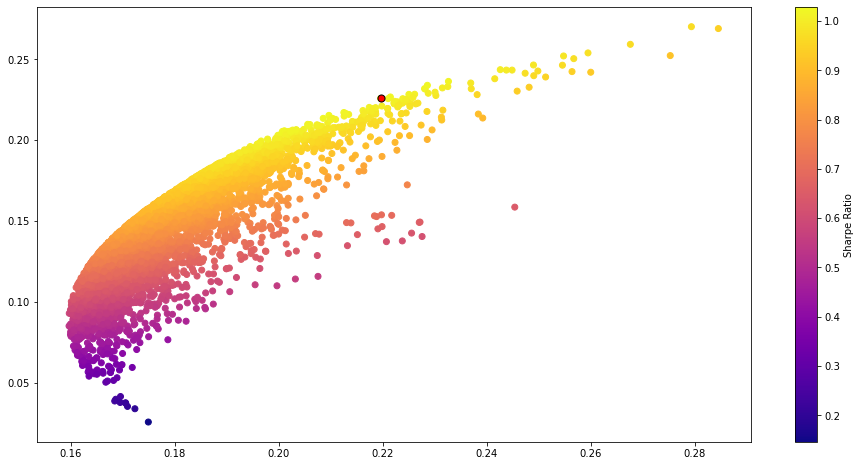

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel='VOL'
plt.ylabel='RET'
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolor='black')

In [18]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [19]:
from scipy.optimize import minimize

In [20]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * - 1

In [21]:
def check_sum(weights):
    return np.sum(weights) - 1


In [22]:
cons=({'type':'eq','fun':check_sum})

In [23]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [24]:
init_guess = [0.25,0.25,0.25,0.25]
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [25]:
opt_results

     fun: -1.0307168703354908
     jac: array([-4.44948673e-05,  5.64306974e-05,  4.18424606e-05,  3.39921713e-01])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.29520409e-01, 2.66289771e-01, 2.04189820e-01, 1.15575952e-16])

In [26]:
opt_results.x

array([5.29520409e-01, 2.66289771e-01, 2.04189820e-01, 1.15575952e-16])

In [27]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [28]:
frontier_y = np.linspace(0,0.3,100)

In [29]:
def mini_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [30]:
frontier_vol=[]
for possible_return in frontier_y:
    cons = ({'type': 'eq','fun':check_sum},
            {'type': 'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(mini_vol,init_guess,method='SLSQP',bounds=bounds, constraints=cons)
    frontier_vol.append(result['fun'])

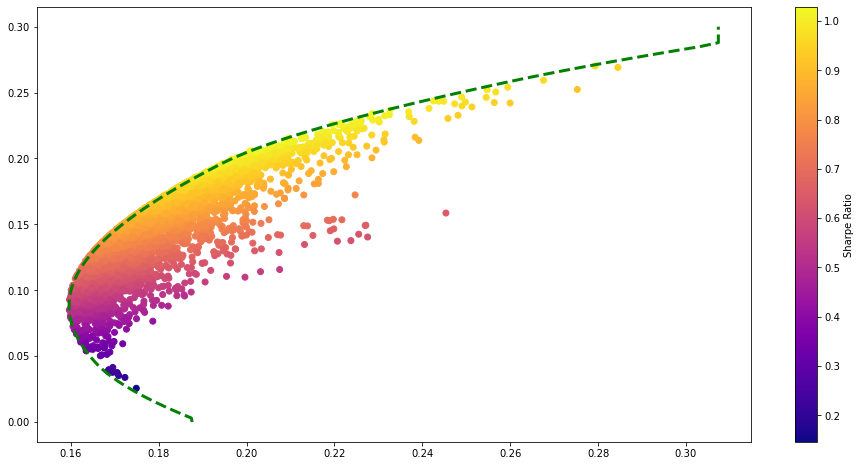

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel='VOL'
plt.ylabel='RET'
plt.plot(frontier_vol,frontier_y,'g--',linewidth=3)
#plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolor='black')